In [4]:
import os 
import numpy as np

data_path=r'dataset' #path for dataset

categories=os.listdir(data_path) #category types in the dataset

print(categories)
labels=np.arange(len(categories))
print(labels)
label_dict=dict(zip(categories,labels))
print(label_dict)

['non-vehicles', 'vehicles']
[0 1]
{'non-vehicles': 0, 'vehicles': 1}


In [6]:
import cv2

img_size=64 #img size 100,100

test_data=[]
test_target=[]

for category in categories:
    
    imgs_path=os.path.join(data_path,category)
    img_names=os.listdir(imgs_path)
    #print(img_names)
    
    for img_name in img_names: #apply preprocessing to data in dataset
        
        img_path=os.path.join(imgs_path,img_name)
        #print(img_path)
        try:
            img=cv2.imread(img_path)
            img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #convert ti 
            img=cv2.resize(img,(img_size,img_size))
            test_data.append(img)
            test_target.append(label_dict[category])
        except Exception as e:
            print(img_path,e)

In [7]:
data_new=np.array(test_data)
target_new=np.array(test_target)

In [8]:
print(data_new.shape)
print(target_new.shape)

(55756, 64, 64)
(55756,)


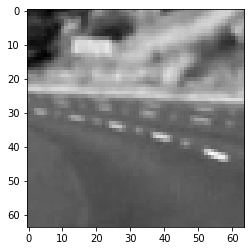

In [9]:
from matplotlib import pyplot as plt

plt.imshow(test_data[45],cmap='gray')

In [10]:
target_new[45]

0

In [11]:
print(data_new.shape)
print(data_new.shape[0],data_new.shape[1],data_new.shape[2])

(55756, 64, 64)
55756 64 64


In [12]:
data_new=data_new.reshape(data_new.shape[0],data_new.shape[1],data_new.shape[2],1) # converting to 4D, CNN needs 4D input
print(data_new.shape)

(55756, 64, 64, 1)


In [13]:
data_new=data_new/255 #normalizing/ Scaling

from keras.utils import np_utils

target_new=np_utils.to_categorical(target_new)

In [14]:
np.save('test_data',data_new)
np.save('test_target',target_new)